### Question:
### Can a machine learning model decide if a person should or should not eat a specific food product given that they have Fatty Liver Disease?
This will not include AFLD/NASH/Fibrosis/etc
###### We are going to choose a random product.


In [1]:
import pandas as pd
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_squared_error

In [2]:
%run PrepTime.ipynb

In [3]:
df = maindf()

C:\Users\isaac\AppData\Local\Temp\ipykernel_1516\839577113.py:2: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("nutritional.tsv", sep="\t")


In [4]:
df = artificialCalories(df)

In [5]:
df = RecoScore(df)

In [6]:
df = shouldYou()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127783 entries, 1 to 356022
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   product_name        127783 non-null  object 
 1   energy_100g         127783 non-null  float64
 2   fat_100g            127783 non-null  float64
 3   saturated-fat_100g  127783 non-null  float64
 4   trans-fat_100g      127783 non-null  float64
 5   cholesterol_100g    127783 non-null  float64
 6   carbohydrates_100g  127783 non-null  float64
 7   sugars_100g         127783 non-null  float64
 8   fiber_100g          127783 non-null  float64
 9   proteins_100g       127783 non-null  float64
 10  sodium_100g         127783 non-null  float64
 11  calcium_100g        127783 non-null  float64
 12  expected_cal        127783 non-null  float64
 13  score               127783 non-null  float64
 14  encode              127783 non-null  int64  
dtypes: float64(13), int64(1), object(1)
mem

In [8]:
df['sugars_100g'].min()

-17.86

In [9]:
df = df.drop([8642, 119086, 152522, 165746])

In [36]:
#df.tail(50)

In [37]:
#minidf.tail(10)

In [38]:
minidf = df[df['encode'] == 3]

In [13]:
X = df[['fat_100g', 'sugars_100g']]
y = df['score']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
model = RandomForestRegressor(n_estimators=10, random_state=42)

In [16]:
model.fit(X,y)

RandomForestRegressor(n_estimators=10, random_state=42)

In [17]:
y_pred = model.predict(X_test)

In [18]:
#sns.scatterplot(data=df, x="fat_100g", y = "sugars_100g")

In [19]:
def categorize_score(score):
    if score <= 0.35:
        return "All good!"
    elif 0.35 < score < 0.7:
        return "Moderate"
    else:
        return "Please do not eat this, it's for your own good!"


In [20]:
#df.info()

In [22]:
def get_user_input():
    #energy_100g = float(input("Enter Energy (100g): "))
    fat_100g = float(input("Enter Fat (100g): "))
    sugars_100g = float(input("Enter Sugars (100g): "))
    #carbohydrates_100g = float(input("Enter Carbohydrates (100g): "))
    #fiber_100g = float(input("Enter Fiber (100g): "))
    #proteins_100g = float(input("Enter Proteins (100g): "))
    #sodium_100g = float(input("Enter Sodium (100g): "))
    #calcium_100g = float(input("Enter Calcium (100g): "))
    #expected_cal = float(input("Enter Expected Calories: "))

    # Create a DataFrame for the new food item
    new_food = pd.DataFrame({
        #'energy_100g': [energy_100g],
        'fat_100g': [fat_100g],
        'sugars_100g': [sugars_100g],
        #'carbohydrates_100g': [carbohydrates_100g],
        #'fiber_100g': [fiber_100g],
        #'proteins_100g': [proteins_100g],
        #'sodium_100g': [sodium_100g],
        #'calcium_100g': [calcium_100g],
        #'expected_cal': [expected_cal]
    })

    return new_food

new_food = get_user_input()
predicted_score = model.predict(new_food)[0]
category = categorize_score(predicted_score)

print(f"\nPredicted Score: {predicted_score}")
print(f"Category: {category}")


Enter Fat (100g):  30
Enter Sugars (100g):  60



Predicted Score: 0.8307692307692308
Category: Please do not eat this, it's for your own good!


In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
your_mse = mean_squared_error(y_test, y_pred)
your_mae = mean_absolute_error(y_test, y_pred)
your_r2 = r2_score(y_test, y_pred)

In [25]:
print(f"MSE: {your_mse} ")
print(f"MAE: {your_mae}")
print(f"R2: {your_r2}")

MSE: 6.177265182964239e-07 
MAE: 9.288913926835858e-05
R2: 0.9999881274528734


In [26]:
# This is on 3 estimators
#MSE: 2.5021789037917668e-06 
#MAE: 0.00012723745790333161
#R2: 0.9999519087556148

In [31]:
df.tail()

,product_name,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,expected_cal,score,encode
355883,Chipotle Peppers In Adobo Sauce,280.0,0.00,0.00,0.0,0.000,16.67,6.67,10.0,0.00,1.267,0.000,66.68,0.066700,1
355884,Dal Makhani,502.0,5.33,1.00,0.0,0.007,13.33,0.00,2.0,4.67,0.540,0.027,119.97,0.041000,1
355968,Organic Z Bar,1393.0,9.72,2.78,0.0,0.000,61.11,30.56,8.3,5.56,0.375,0.556,354.16,0.380369,2
355985,Natural Cassava,1477.0,0.00,0.00,0.0,0.000,87.06,2.35,4.7,1.18,0.012,0.000,352.96,0.023500,1
356022,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",0.0,0.00,0.00,0.0,0.000,0.00,0.00,0.0,0.00,0.000,0.000,0.00,0.000000,1


In [30]:
df[df['sodium_100g'] == 1200.0 ]

,product_name,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,expected_cal,score,encode
141166,Sauce & Marinade,280.0,0.0,0.0,0.0,0.0,13.33,6.67,0.0,0.0,1200.0,0.0,53.32,0.0667,1


In [29]:
df['sodium_100g'].max()

1200.0

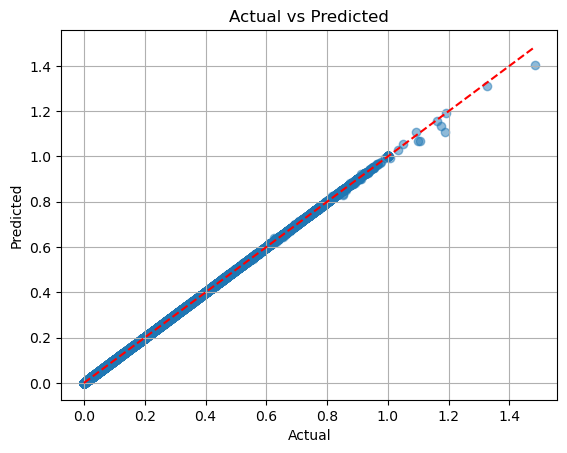

In [33]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()



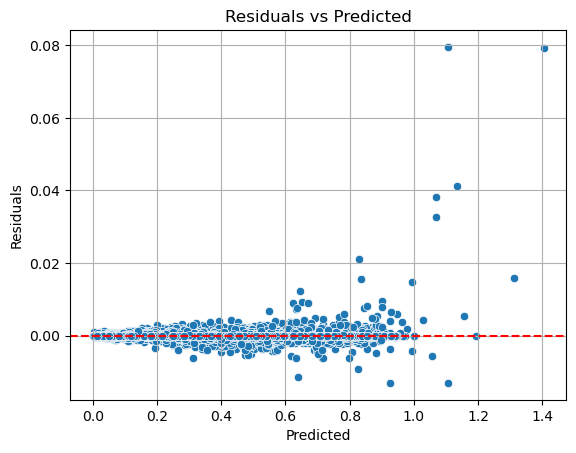

In [34]:
import seaborn as sns

residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.grid(True)
plt.show()
